In [25]:
import numpy as np
import os
from  natsort import natsorted
import imageio
import re
import time
import glob
import pandas as pd
import argparse
import xml.etree.ElementTree as ET
import imageio
import matplotlib.pyplot as plt

In [43]:
IMAGES_PATH = 'Data/dataset_1/Subset_AC/AC/train/jpeg'
XML_PATH = 'Data\\dataset_1\\Subset_AC\\AC\\train\\xml'
OUT_PATH = 'Data\\dataset_1\\Cropped'

In [17]:
img = imageio.imread(os.path.join(IMAGES_PATH, '1.jpg'))
xml_file = os.path.join(XML_PATH, '1.xml')

In [16]:
print(img.shape)

(240, 352, 3)


In [30]:
def crop_image(image_np, value):
    im_height, im_width, _ = img.shape
    (ymin, xmin, ymax, xmax) = value[5:]
    crop_img = image_np[xmin:xmax, ymin:ymax]
    return crop_img

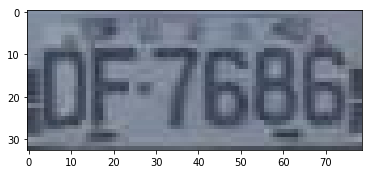

In [32]:
plt.imshow(crop_img)

In [40]:
value

('1', 352, 240, 'plate', 'DF7686', 168, 182, 247, 215)

c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


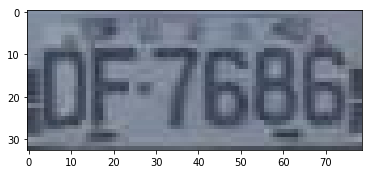

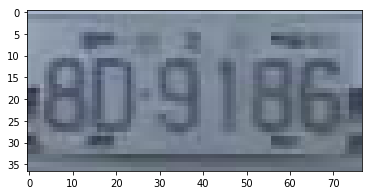

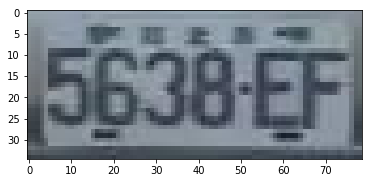

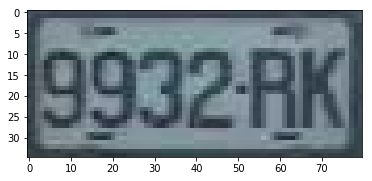

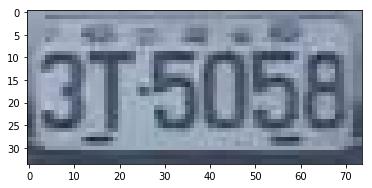

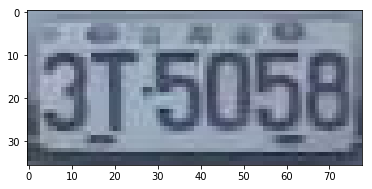

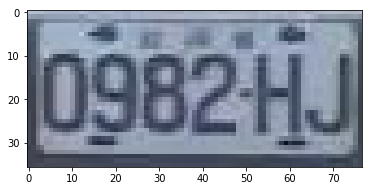

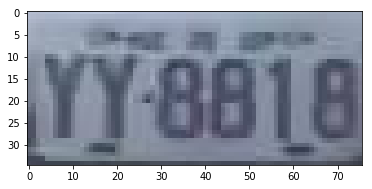

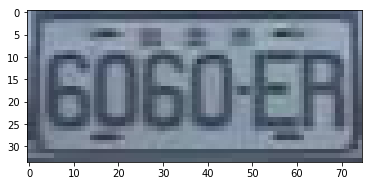

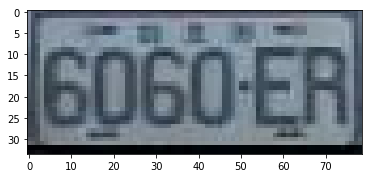

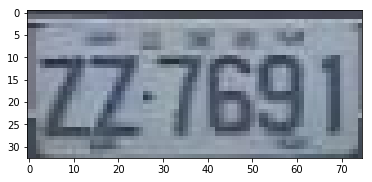

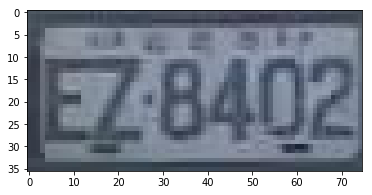

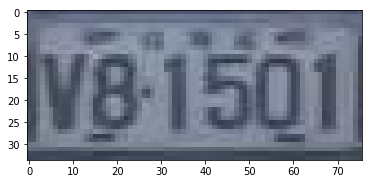

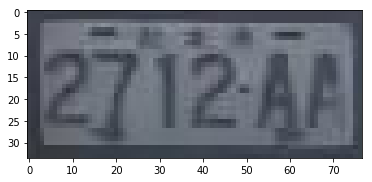

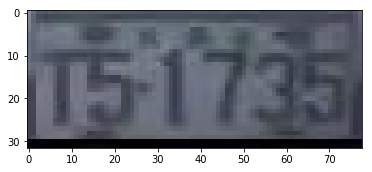

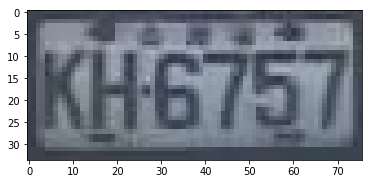

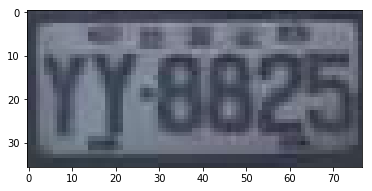

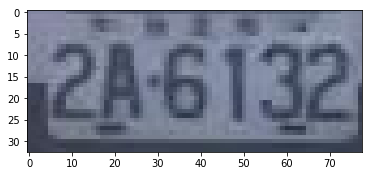

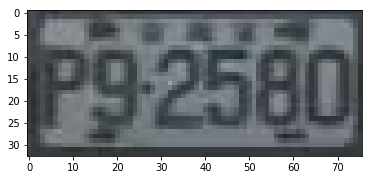

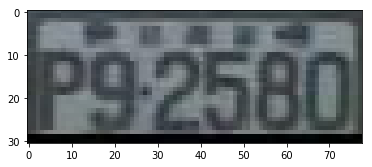

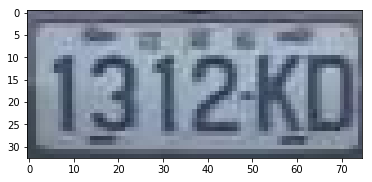

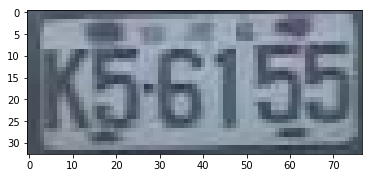

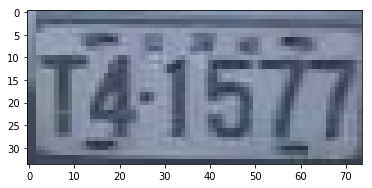

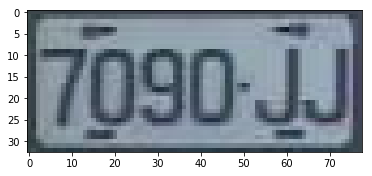

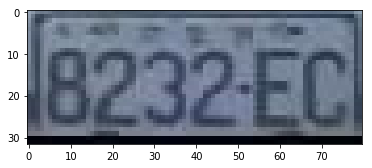

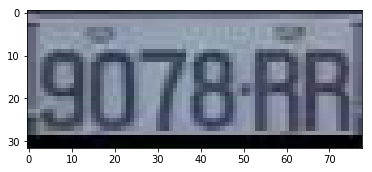

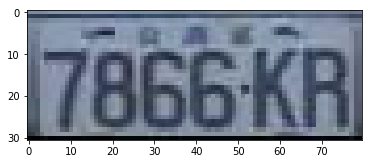

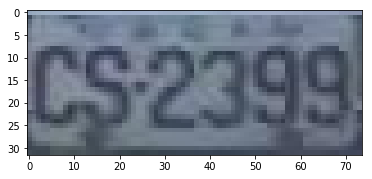

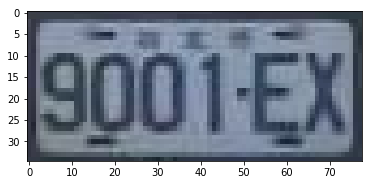

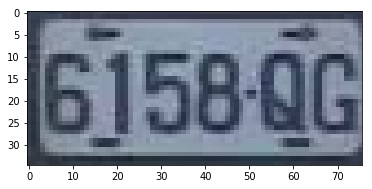

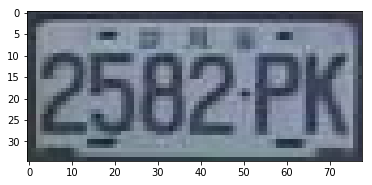

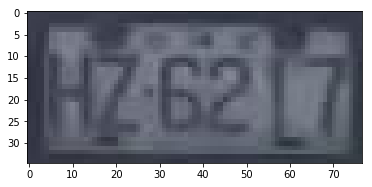

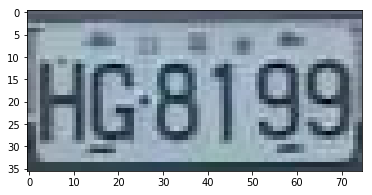

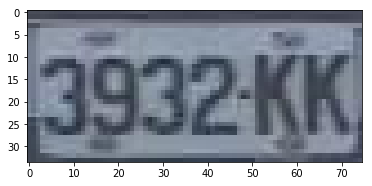

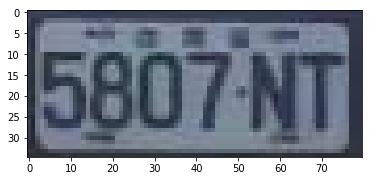

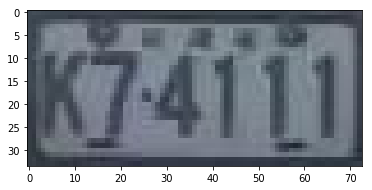

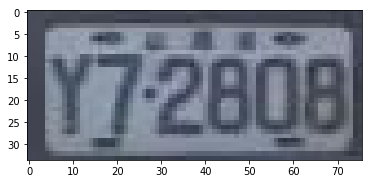

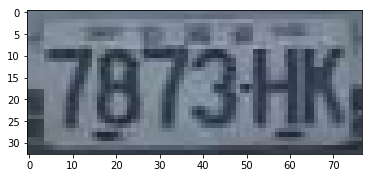

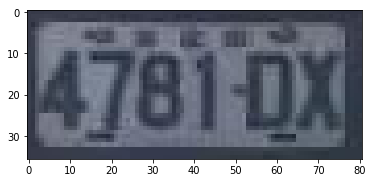

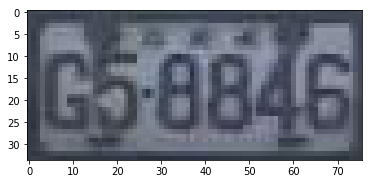

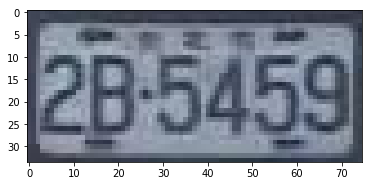

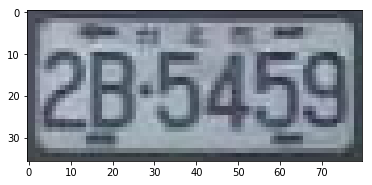

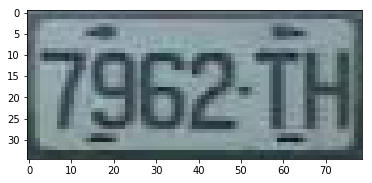

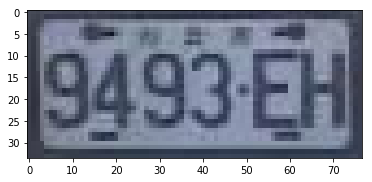

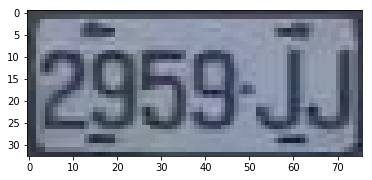

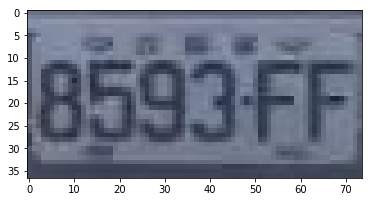

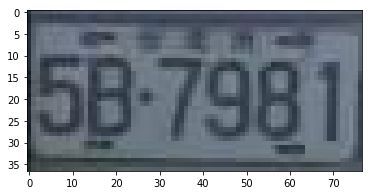

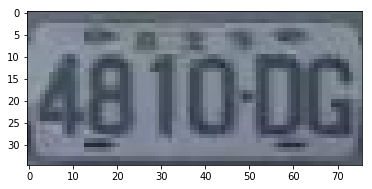

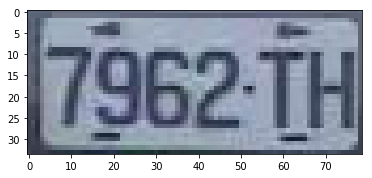

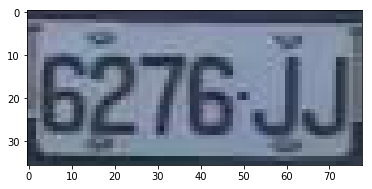

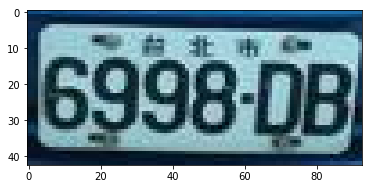

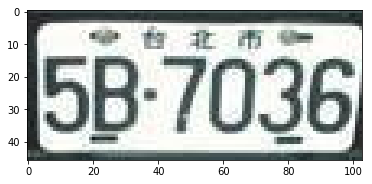

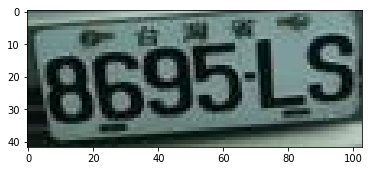

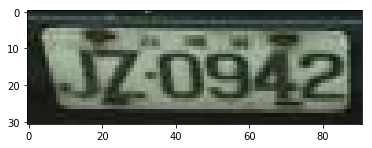

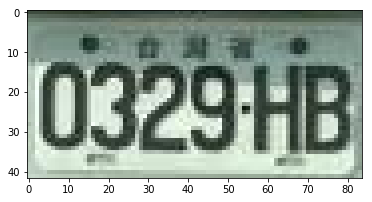

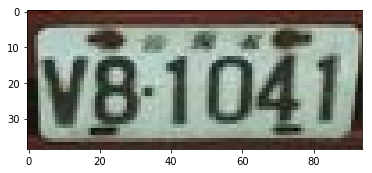

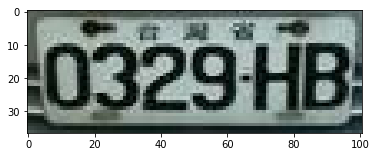

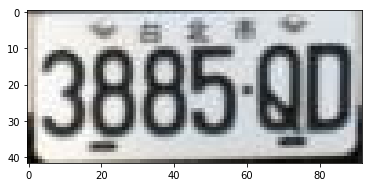

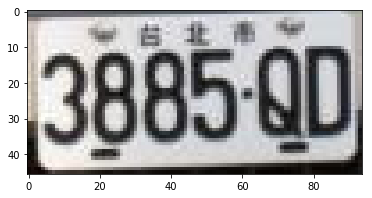

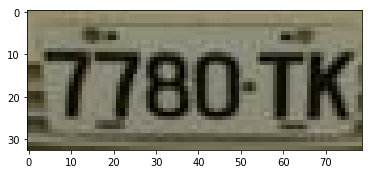

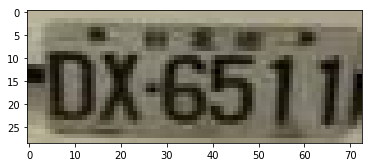

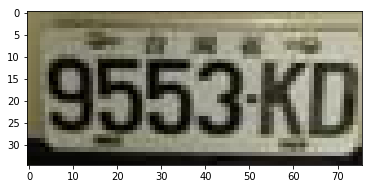

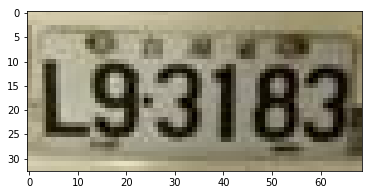

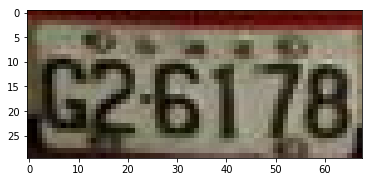

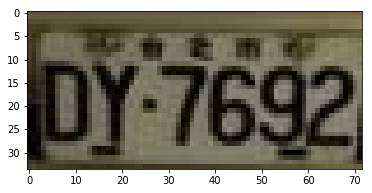

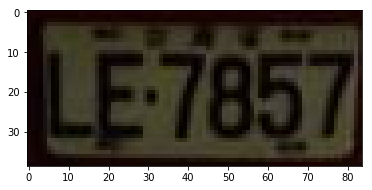

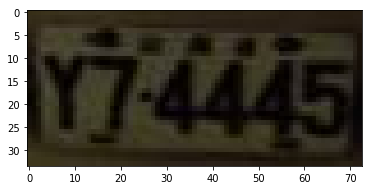

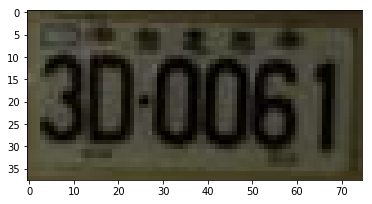

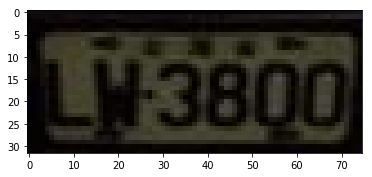

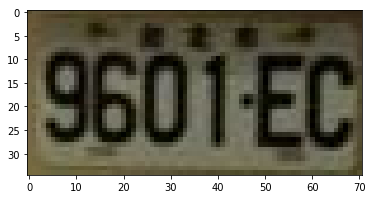

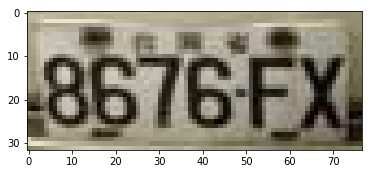

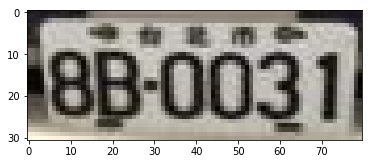

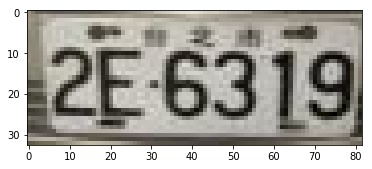

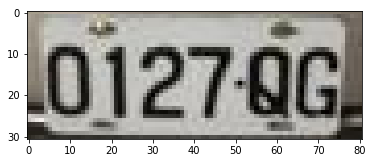

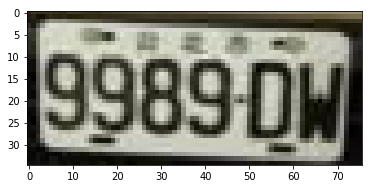

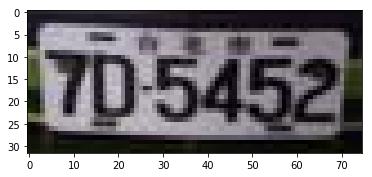

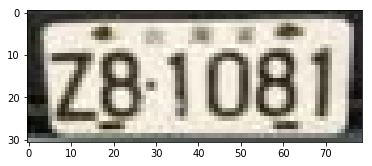

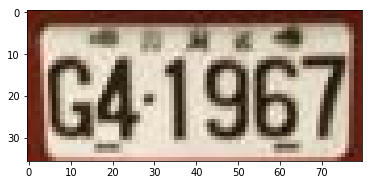

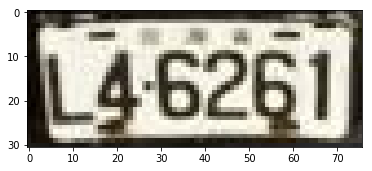

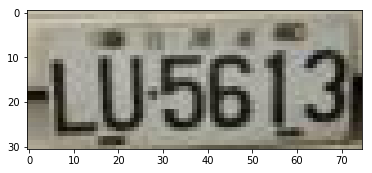

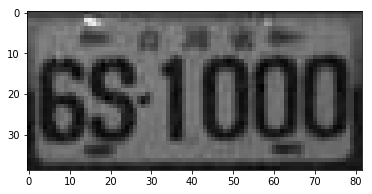

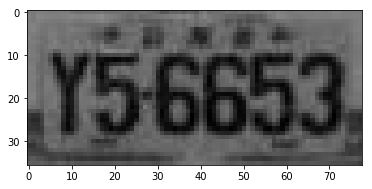

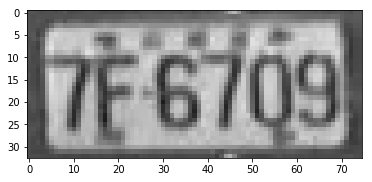

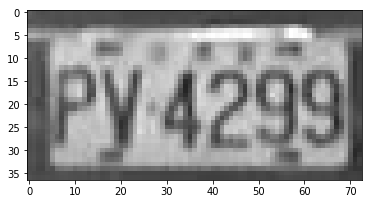

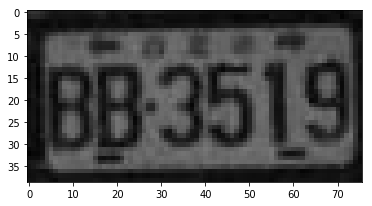

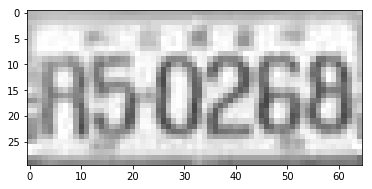

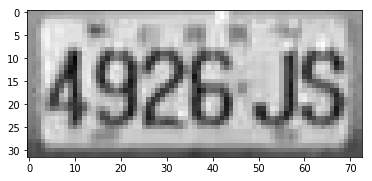

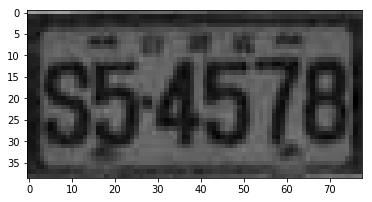

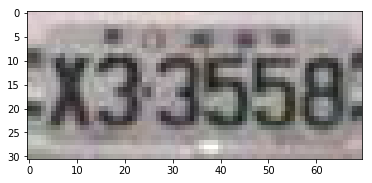

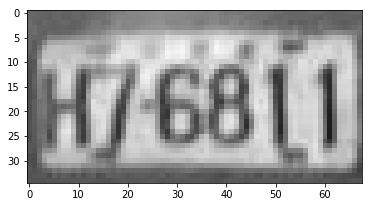

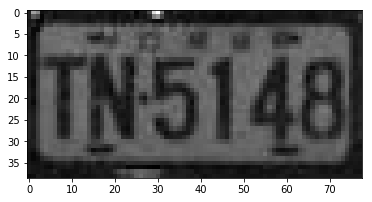

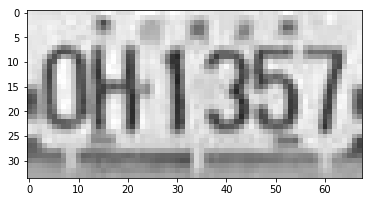

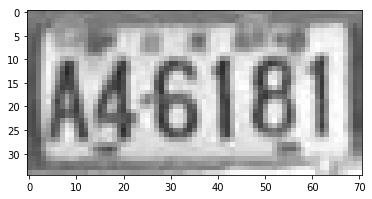

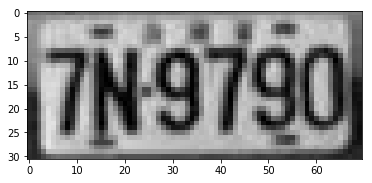

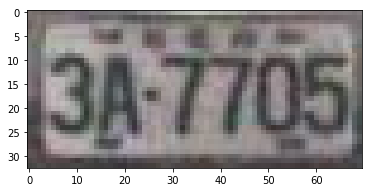

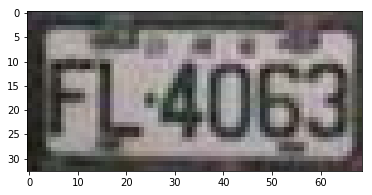

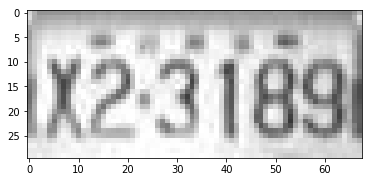

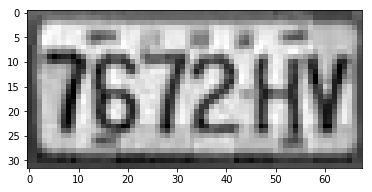

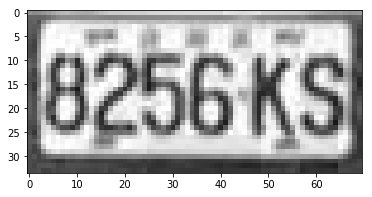

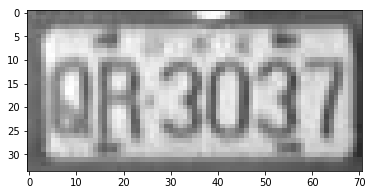

In [47]:
names = [ d for d in os.listdir(IMAGES_PATH) if d.endswith( '.jpg') ]
names = natsorted(names)
for image in names:
    img = imageio.imread(os.path.join(IMAGES_PATH, image))
    xml_file = os.path.join(XML_PATH, image.split('.')[0]+'.xml')
    tree = ET.parse(xml_file)
    root = tree.getroot()
    for member in root.findall('object'):
        value = (root.find('filename').text.split('.')[0],
                int(root.find('size')[0].text),
                int(root.find('size')[1].text),
                member[0].text,member[1].text,
                int(member[5][0].text),
                int(member[5][1].text),
                int(member[5][2].text),
                int(member[5][3].text))
        crop_img = crop_image(img, value)
#     plt.figure()
#     plt.imshow(crop_img)
    imageio.imwrite(os.path.join(OUT_PATH,'{}_{}.jpg'.format(value[0],value[4])), crop_img)
#     image_list.append(imageio.imread(os.path.join(pictures_dir, image)))
#     label = re.split('[._]', image)
#     labels.append(class_dict[label[1]])
#     print(image)
